In [1]:
import numpy as np
import pandas as pd
import math
import statistics
import scipy.stats
import datetime
import matplotlib.pyplot as plt

In [2]:
DevOps = pd.read_csv("Tareas2.csv")

In [3]:
DevOps.head(10)

,ID,Work Item Type,Title,Assigned To,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description
0,8153,User Story,Pase a producción del job TMTO202,Carlos Prieto <carlos.prieto@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 09:04:10,1/9/2022 09:03:57,1/9/2022 09:03:27,<div>Enviar a producción (correo a Mireles) de...
1,8155,User Story,Modificación y eliminación de CyB en pipelines...,Carlos Prieto <carlos.prieto@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 81,2/9/2022 18:21:42,1/9/2022 09:07:27,1/9/2022 09:07:04,<div>Modificar pipeline de PS para eliminar lo...
2,8157,User Story,Validación de Imperdonables con Agrupación Est...,Carlos Prieto <carlos.prieto@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 13:08:56,1/9/2022 12:54:49,1/9/2022 12:30:55,<div>Validar cambios en imperdonables con arch...
3,8159,User Story,Retirar precio lista de notebook Customers,Carlos Aquino <carlos.aquinop@lindley.pe>,Closed,NaN,PEAdvancedAnalytics\Sprint 43,1/9/2022 16:57:07,1/9/2022 16:15:39,1/9/2022 16:15:35,<div>Se debe eliminar la fuente de Precio list...
4,8162,User Story,migración de MX a PE - ajuste proceso diario PS,DS Michael <michael.quintanah@lindley.pe>,Closed,NaN,PEAdvancedAnalytics\Sprint 43,9/9/2022 10:13:40,9/9/2022 10:05:17,1/9/2022 18:17:30,<div>migración del ajuste diario en PS - adapt...
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,César Rocha <cesar.rochah@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:01:13,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...
6,8168,User Story,Plataforma PS: Formato de entregas para client...,César Rocha <cesar.rochah@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:04:43,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi..."
7,8169,User Story,PxC: Integración de producto competencia a Ped...,César Rocha <cesar.rochah@arcacontal.com>,New,NaN,MXAdvancedAnalytics\Sprint 83,NaN,NaN,1/9/2022 19:50:35,<div>Se define y desarrolla la lógica en que s...
8,8179,User Story,Fix NB reporte mensual PdV,arnold.condor <arnold.condor@lindley.pe>,Closed,NaN,PEAdvancedAnalytics\Sprint 43,2/9/2022 08:33:48,2/9/2022 07:54:26,2/9/2022 07:51:58,<div>Se revisará el motivo de error en la entr...
9,8185,User Story,PdV Verificación de elite sampling,Isidro Reyes <isidro.reyes@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 81,5/9/2022 09:12:24,2/9/2022 09:15:59,2/9/2022 09:07:22,<div>Verificar el código que realiza el sampli...


In [4]:
check_for_nan = DevOps["Iteration Path"].isnull()
print (check_for_nan)

0      False
1      False
2      False
3      False
4      False
       ...  
214    False
215    False
216    False
217    False
218    False
Name: Iteration Path, Length: 219, dtype: bool


In [5]:
DevOps1 = DevOps["Assigned To"].str.split("<", n = 1, expand = True)
DevOps1

,0,1
0,Carlos Prieto,carlos.prieto@arcacontal.com>
1,Carlos Prieto,carlos.prieto@arcacontal.com>
2,Carlos Prieto,carlos.prieto@arcacontal.com>
3,Carlos Aquino,carlos.aquinop@lindley.pe>
4,DS Michael,michael.quintanah@lindley.pe>
...,...,...
214,EDMUNDO REYES JAIME,edmundo.reyes@ext.arcacontal.com>
215,arnold.condor,arnold.condor@lindley.pe>
216,arnold.condor,arnold.condor@lindley.pe>
217,DS Michael,michael.quintanah@lindley.pe>


In [6]:
DevOps["Assigned to Name"]= DevOps1[0]
DevOps["Assigned to Email"]= DevOps1[1]

In [7]:
DevOps.head(5)

,ID,Work Item Type,Title,Assigned To,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Assigned to Email
0,8153,User Story,Pase a producción del job TMTO202,Carlos Prieto <carlos.prieto@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 09:04:10,1/9/2022 09:03:57,1/9/2022 09:03:27,<div>Enviar a producción (correo a Mireles) de...,Carlos Prieto,carlos.prieto@arcacontal.com>
1,8155,User Story,Modificación y eliminación de CyB en pipelines...,Carlos Prieto <carlos.prieto@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 81,2/9/2022 18:21:42,1/9/2022 09:07:27,1/9/2022 09:07:04,<div>Modificar pipeline de PS para eliminar lo...,Carlos Prieto,carlos.prieto@arcacontal.com>
2,8157,User Story,Validación de Imperdonables con Agrupación Est...,Carlos Prieto <carlos.prieto@arcacontal.com>,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 13:08:56,1/9/2022 12:54:49,1/9/2022 12:30:55,<div>Validar cambios en imperdonables con arch...,Carlos Prieto,carlos.prieto@arcacontal.com>
3,8159,User Story,Retirar precio lista de notebook Customers,Carlos Aquino <carlos.aquinop@lindley.pe>,Closed,NaN,PEAdvancedAnalytics\Sprint 43,1/9/2022 16:57:07,1/9/2022 16:15:39,1/9/2022 16:15:35,<div>Se debe eliminar la fuente de Precio list...,Carlos Aquino,carlos.aquinop@lindley.pe>
4,8162,User Story,migración de MX a PE - ajuste proceso diario PS,DS Michael <michael.quintanah@lindley.pe>,Closed,NaN,PEAdvancedAnalytics\Sprint 43,9/9/2022 10:13:40,9/9/2022 10:05:17,1/9/2022 18:17:30,<div>migración del ajuste diario en PS - adapt...,DS Michael,michael.quintanah@lindley.pe>


In [8]:
DevOps.drop(columns =["Assigned To"], inplace = True)

In [9]:
DO2 = DevOps["Assigned to Email"].str.split(">", n = 1, expand = True)

In [10]:
DevOps["Email"]= DO2[0]
DevOps["Email2"]= DO2[1]
DevOps.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Assigned to Email,Email,Email2
0,8153,User Story,Pase a producción del job TMTO202,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 09:04:10,1/9/2022 09:03:57,1/9/2022 09:03:27,<div>Enviar a producción (correo a Mireles) de...,Carlos Prieto,carlos.prieto@arcacontal.com>,carlos.prieto@arcacontal.com,
1,8155,User Story,Modificación y eliminación de CyB en pipelines...,Closed,NaN,MXAdvancedAnalytics\Sprint 81,2/9/2022 18:21:42,1/9/2022 09:07:27,1/9/2022 09:07:04,<div>Modificar pipeline de PS para eliminar lo...,Carlos Prieto,carlos.prieto@arcacontal.com>,carlos.prieto@arcacontal.com,
2,8157,User Story,Validación de Imperdonables con Agrupación Est...,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 13:08:56,1/9/2022 12:54:49,1/9/2022 12:30:55,<div>Validar cambios en imperdonables con arch...,Carlos Prieto,carlos.prieto@arcacontal.com>,carlos.prieto@arcacontal.com,
3,8159,User Story,Retirar precio lista de notebook Customers,Closed,NaN,PEAdvancedAnalytics\Sprint 43,1/9/2022 16:57:07,1/9/2022 16:15:39,1/9/2022 16:15:35,<div>Se debe eliminar la fuente de Precio list...,Carlos Aquino,carlos.aquinop@lindley.pe>,carlos.aquinop@lindley.pe,
4,8162,User Story,migración de MX a PE - ajuste proceso diario PS,Closed,NaN,PEAdvancedAnalytics\Sprint 43,9/9/2022 10:13:40,9/9/2022 10:05:17,1/9/2022 18:17:30,<div>migración del ajuste diario en PS - adapt...,DS Michael,michael.quintanah@lindley.pe>,michael.quintanah@lindley.pe,


In [11]:
DevOps.drop(columns =["Assigned to Email"], inplace = True)
DevOps.drop(columns =["Email2"], inplace = True)

In [12]:
DevOps.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Email
0,8153,User Story,Pase a producción del job TMTO202,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 09:04:10,1/9/2022 09:03:57,1/9/2022 09:03:27,<div>Enviar a producción (correo a Mireles) de...,Carlos Prieto,carlos.prieto@arcacontal.com
1,8155,User Story,Modificación y eliminación de CyB en pipelines...,Closed,NaN,MXAdvancedAnalytics\Sprint 81,2/9/2022 18:21:42,1/9/2022 09:07:27,1/9/2022 09:07:04,<div>Modificar pipeline de PS para eliminar lo...,Carlos Prieto,carlos.prieto@arcacontal.com
2,8157,User Story,Validación de Imperdonables con Agrupación Est...,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 13:08:56,1/9/2022 12:54:49,1/9/2022 12:30:55,<div>Validar cambios en imperdonables con arch...,Carlos Prieto,carlos.prieto@arcacontal.com
3,8159,User Story,Retirar precio lista de notebook Customers,Closed,NaN,PEAdvancedAnalytics\Sprint 43,1/9/2022 16:57:07,1/9/2022 16:15:39,1/9/2022 16:15:35,<div>Se debe eliminar la fuente de Precio list...,Carlos Aquino,carlos.aquinop@lindley.pe
4,8162,User Story,migración de MX a PE - ajuste proceso diario PS,Closed,NaN,PEAdvancedAnalytics\Sprint 43,9/9/2022 10:13:40,9/9/2022 10:05:17,1/9/2022 18:17:30,<div>migración del ajuste diario en PS - adapt...,DS Michael,michael.quintanah@lindley.pe


In [13]:
DevOps["Email"].value_counts()

edmundo.reyes@ext.arcacontal.com     28
juan.loerat@arcacontal.com           26
diego.mavila@lindley.pe              16
donaldo.salazar@arcacontal.com       15
diego.garcias@arcacontal.com         14
lizzie.canamar@arcacontal.com        14
veronica.castillom@arcacontal.com    13
carlos.prieto@arcacontal.com         11
arnold.condor@lindley.pe             10
carlos.aquinop@lindley.pe             9
brissa.romero@ext.arcacontal.com      8
cesar.rochah@arcacontal.com           8
jesus.hinojosa@arcacontal.com         6
isidro.reyes@arcacontal.com           5
michael.quintanah@lindley.pe          5
viviana.vazquez@arcacontal.com        3
felipe.chairez@arcacontal.com         3
raul.martinezt@arcacontal.com         3
Name: Email, dtype: int64

In [14]:
conditions = [
    (DevOps["Email"] == "veronica.castillom@arcacontal.com") | 
    (DevOps["Email"] == "edmundo.reyes@ext.arcacontal.com") |
    (DevOps["Email"] == "juan.loerat@arcacontal.com") |
    (DevOps["Email"] == "diego.mavila@lindley.pe") |
    (DevOps["Email"] == "isidro.reyes@arcacontal.com")
    ,
    (DevOps["Email"] == "lizzie.canamar@arcacontal.com") |
    (DevOps["Email"] == "diego.garcias@arcacontal.com") |
    (DevOps["Email"] == "donaldo.salazar@arcacontal.com") |
    (DevOps["Email"] == "carlos.prieto@arcacontal.com") |
    (DevOps["Email"] == "viviana.vazquez@arcacontal.com") |
    (DevOps["Email"] == "carlos.aquinop@lindley.pe") |
    (DevOps["Email"] == "luis.cepeda@arcacontal.com") |
    (DevOps["Email"] == "ivan.ramirezm@arcacontal.com")
    ,
    (DevOps["Email"] == "arnold.condor@lindley.pe") |
    (DevOps["Email"] == "jesus.hinojosa@arcacontal.com") |
    (DevOps["Email"] == "michael.quintanah@lindley.pe") |
    (DevOps["Email"] == "alejandro.balderas@ext.arcacontal.com") |
    (DevOps["Email"] == "cesar.rochah@arcacontal.com") |
    (DevOps["Email"] == "brissa.romero@ext.arcacontal.com") |
    (DevOps["Email"] == "felipe.chairez@arcacontal.com") |
    (DevOps["Email"] == "raul.martinezt@arcacontal.com") |
    (DevOps["Email"] == "jose.moralesv@arcacontal.com")
    ]

In [15]:
values = ["Data Translators", "Data Engineer", "Data Scientist"]

In [16]:
DevOps["Area"] = np.select(conditions, values)

In [17]:
DevOps.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Email,Area
0,8153,User Story,Pase a producción del job TMTO202,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 09:04:10,1/9/2022 09:03:57,1/9/2022 09:03:27,<div>Enviar a producción (correo a Mireles) de...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer
1,8155,User Story,Modificación y eliminación de CyB en pipelines...,Closed,NaN,MXAdvancedAnalytics\Sprint 81,2/9/2022 18:21:42,1/9/2022 09:07:27,1/9/2022 09:07:04,<div>Modificar pipeline de PS para eliminar lo...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer
2,8157,User Story,Validación de Imperdonables con Agrupación Est...,Closed,NaN,MXAdvancedAnalytics\Sprint 81,1/9/2022 13:08:56,1/9/2022 12:54:49,1/9/2022 12:30:55,<div>Validar cambios en imperdonables con arch...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer
3,8159,User Story,Retirar precio lista de notebook Customers,Closed,NaN,PEAdvancedAnalytics\Sprint 43,1/9/2022 16:57:07,1/9/2022 16:15:39,1/9/2022 16:15:35,<div>Se debe eliminar la fuente de Precio list...,Carlos Aquino,carlos.aquinop@lindley.pe,Data Engineer
4,8162,User Story,migración de MX a PE - ajuste proceso diario PS,Closed,NaN,PEAdvancedAnalytics\Sprint 43,9/9/2022 10:13:40,9/9/2022 10:05:17,1/9/2022 18:17:30,<div>migración del ajuste diario en PS - adapt...,DS Michael,michael.quintanah@lindley.pe,Data Scientist


In [18]:
DevOps["Iteration Path"].value_counts()

MXAdvancedAnalytics\Sprint 83     43
MXAdvancedAnalytics\Sprint 82     28
PEAdvancedAnalytics\Sprint 45     27
ECAdvancedAnalytics\Sprint 25     27
ECAdvancedAnalytics\Sprint 26     27
ARGAdvancedAnalytics\Sprint 12    17
PEAdvancedAnalytics\Sprint 44     14
MXAdvancedAnalytics               12
MXAdvancedAnalytics\Sprint 81      7
PEAdvancedAnalytics\Sprint 43      6
ECAdvancedAnalytics                4
PEAdvancedAnalytics                4
ARGAdvancedAnalytics               2
ECAdvancedAnalytics\Sprint 24      1
Name: Iteration Path, dtype: int64

In [19]:
LastSprint = ["MXAdvancedAnalytics\Sprint 82", "ECAdvancedAnalytics\Sprint 25", "PEAdvancedAnalytics\Sprint 44"]
DFSprint = pd.DataFrame(DevOps[DevOps["Iteration Path"].isin(LastSprint)])

In [20]:
DFSprint.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Email,Area
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:01:13,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:04:43,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,28/9/2022 09:16:04,8/9/2022 09:17:26,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,28/9/2022 16:31:00,12/9/2022 09:14:43,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,26/9/2022 08:40:21,13/9/2022 09:18:08,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist


In [21]:
conditions2 =  [
    (DFSprint["Iteration Path"] == "MXAdvancedAnalytics\Sprint 82") ,
    (DFSprint["Iteration Path"] == "ECAdvancedAnalytics\Sprint 25") ,
    (DFSprint["Iteration Path"] == "PEAdvancedAnalytics\Sprint 44")
    ]
values2 = ["MX", "EC", "PE"]

In [22]:
DFSprint["BU"] = np.select(conditions2, values2)
DFSprint

,ID,Work Item Type,Title,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Email,Area,BU
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:01:13,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:04:43,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,28/9/2022 09:16:04,8/9/2022 09:17:26,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist,MX
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,28/9/2022 16:31:00,12/9/2022 09:14:43,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer,MX
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,26/9/2022 08:40:21,13/9/2022 09:18:08,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist,PE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,8619,User Story,Excluir clientes con PXC de reporte MPR,Closed,NaN,MXAdvancedAnalytics\Sprint 82,6/10/2022 08:38:13,6/10/2022 07:42:27,6/10/2022 07:41:53,NaN,Lizzie Montserrat Canamar Carrillo,lizzie.canamar@arcacontal.com,Data Engineer,MX
121,8625,User Story,apoyo a DTs en visita de PXC,Closed,NaN,MXAdvancedAnalytics\Sprint 82,6/10/2022 09:10:00,6/10/2022 09:10:00,6/10/2022 09:09:54,<div>se solicitó el apoyo a los DTs en las vis...,EDMUNDO REYES JAIME,edmundo.reyes@ext.arcacontal.com,Data Translators,MX
125,8631,User Story,Evaluación de H2O,Closed,NaN,MXAdvancedAnalytics\Sprint 82,7/10/2022 11:31:45,6/10/2022 11:03:31,6/10/2022 10:59:48,<div>Evaluación de los resultados del modelo d...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX
129,8645,User Story,PxC Visita Chihuahua,Closed,NaN,MXAdvancedAnalytics\Sprint 82,7/10/2022 15:08:05,7/10/2022 15:08:05,7/10/2022 15:06:44,<div>Se realizará la visita a Chiuahua para el...,Juan Carlos Loera Tovar,juan.loerat@arcacontal.com,Data Translators,MX


In [23]:
DFSprint["State"].value_counts()

Closed    68
Active     1
Name: State, dtype: int64

In [24]:
result = DFSprint.dtypes
result

ID                   int64
Work Item Type      object
Title               object
State               object
Tags                object
Iteration Path      object
Closed Date         object
Activated Date      object
Created Date        object
Description         object
Assigned to Name    object
Email               object
Area                object
BU                  object
dtype: object

In [25]:
DO3 = DFSprint["Closed Date"].str.split(" ", n = 1, expand = True)
DFSprint["Closed_Date"]= DO3[0]
DFSprint["Hours"]= DO3[1]
DFSprint.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Email,Area,BU,Closed_Date,Hours
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:01:13,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,23/9/2022,18:02:40
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:04:43,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,23/9/2022,18:02:40
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,28/9/2022 09:16:04,8/9/2022 09:17:26,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist,MX,28/9/2022,09:16:04
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,28/9/2022 16:31:00,12/9/2022 09:14:43,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer,MX,28/9/2022,16:31:00
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,26/9/2022 08:40:21,13/9/2022 09:18:08,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist,PE,26/9/2022,08:40:21


In [26]:
DO4 = DFSprint["Activated Date"].str.split(" ", n = 1, expand = True)
DFSprint["Activated_Date"]= DO4[0]
DFSprint["Hours2"]= DO4[1]
DFSprint.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Closed Date,Activated Date,Created Date,Description,Assigned to Name,Email,Area,BU,Closed_Date,Hours,Activated_Date,Hours2
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:01:13,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,23/9/2022,18:02:40,1/9/2022,20:01:13
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,23/9/2022 18:02:40,1/9/2022 20:04:43,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,23/9/2022,18:02:40,1/9/2022,20:04:43
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,28/9/2022 09:16:04,8/9/2022 09:17:26,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist,MX,28/9/2022,09:16:04,8/9/2022,09:17:26
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,28/9/2022 16:31:00,12/9/2022 09:14:43,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer,MX,28/9/2022,16:31:00,12/9/2022,09:14:43
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,26/9/2022 08:40:21,13/9/2022 09:18:08,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist,PE,26/9/2022,08:40:21,13/9/2022,09:18:08


In [27]:
DFSprint.drop(columns =["Closed Date"], inplace = True)
DFSprint.drop(columns =["Activated Date"], inplace = True)
DFSprint.drop(columns =["Hours"], inplace = True)
DFSprint.drop(columns =["Hours2"], inplace = True)

In [28]:
DFSprint["Closed_Date"] = pd.to_datetime(DFSprint["Closed_Date"], dayfirst=True)
DFSprint["Activated_Date"] = pd.to_datetime(DFSprint["Activated_Date"], dayfirst=True)

In [29]:
DFSprint.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Created Date,Description,Assigned to Name,Email,Area,BU,Closed_Date,Activated_Date
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist,MX,2022-09-28,2022-09-08
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer,MX,2022-09-28,2022-09-12
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist,PE,2022-09-26,2022-09-13


In [30]:
result = DFSprint.dtypes
result

ID                           int64
Work Item Type              object
Title                       object
State                       object
Tags                        object
Iteration Path              object
Created Date                object
Description                 object
Assigned to Name            object
Email                       object
Area                        object
BU                          object
Closed_Date         datetime64[ns]
Activated_Date      datetime64[ns]
dtype: object

In [31]:
DFSprint["TimeToComplete"] = DFSprint["Closed_Date"] - DFSprint["Activated_Date"]

In [32]:
DFSprint.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Created Date,Description,Assigned to Name,Email,Area,BU,Closed_Date,Activated_Date,TimeToComplete
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01,22 days
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01,22 days
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist,MX,2022-09-28,2022-09-08,20 days
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer,MX,2022-09-28,2022-09-12,16 days
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist,PE,2022-09-26,2022-09-13,13 days


In [33]:
result2 = DFSprint.dtypes
result2

ID                            int64
Work Item Type               object
Title                        object
State                        object
Tags                         object
Iteration Path               object
Created Date                 object
Description                  object
Assigned to Name             object
Email                        object
Area                         object
BU                           object
Closed_Date          datetime64[ns]
Activated_Date       datetime64[ns]
TimeToComplete      timedelta64[ns]
dtype: object

In [34]:
DFSprint['Days to Complete'] = DFSprint['TimeToComplete'].dt.days
DFSprint.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Created Date,Description,Assigned to Name,Email,Area,BU,Closed_Date,Activated_Date,TimeToComplete,Days to Complete
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01,22 days,22.0
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01,22 days,22.0
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist,MX,2022-09-28,2022-09-08,20 days,20.0
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer,MX,2022-09-28,2022-09-12,16 days,16.0
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist,PE,2022-09-26,2022-09-13,13 days,13.0


In [35]:
DFSprint["Time Active"] = np.where(DFSprint["Days to Complete"]> 5, "Warning", "On Time")

In [36]:
DFSprint.drop(columns =["TimeToComplete"], inplace = True)
DFSprint.head()

,ID,Work Item Type,Title,State,Tags,Iteration Path,Created Date,Description,Assigned to Name,Email,Area,BU,Closed_Date,Activated_Date,Days to Complete,Time Active
5,8167,User Story,Plataforma PS: Compensa con ordenes del día,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:47:08,<div>Se integrará la fuente de ordenes del día...,César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01,22.0,Warning
6,8168,User Story,Plataforma PS: Formato de entregas para client...,Closed,NaN,MXAdvancedAnalytics\Sprint 82,1/9/2022 19:48:17,"<div>Para el release de Plataforma PS, el equi...",César Rocha,cesar.rochah@arcacontal.com,Data Scientist,MX,2022-09-23,2022-09-01,22.0,Warning
12,8218,User Story,PDV - Validar impacto de cambio en prodkeys,Closed,NaN,MXAdvancedAnalytics\Sprint 82,8/9/2022 09:15:33,<div>&nbsp;Validar impacto de cambio en prodke...,Brissa Romero,brissa.romero@ext.arcacontal.com,Data Scientist,MX,2022-09-28,2022-09-08,20.0,Warning
16,8240,User Story,Crear fuente con datos de CENSO,Closed,Data Engineering,MXAdvancedAnalytics\Sprint 82,12/9/2022 08:22:44,<div>Crear una fuente utilizando los datos de ...,Carlos Prieto,carlos.prieto@arcacontal.com,Data Engineer,MX,2022-09-28,2022-09-12,16.0,Warning
17,8248,User Story,Diagnostico de Clientes con MKT size potencial...,Closed,NaN,PEAdvancedAnalytics\Sprint 44,13/9/2022 09:13:45,<div>Se analizará el origen de la incidencia d...,arnold.condor,arnold.condor@lindley.pe,Data Scientist,PE,2022-09-26,2022-09-13,13.0,Warning


In [37]:
DFSprint["Days to Complete"].max()

22.0

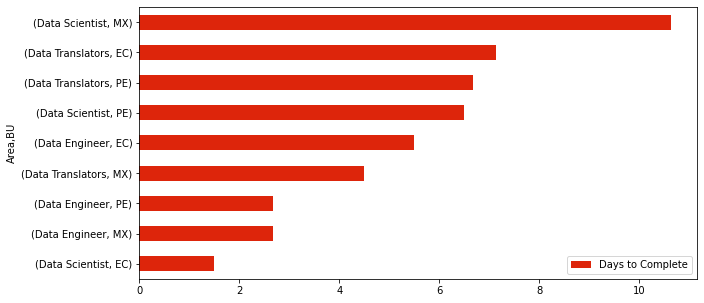

In [38]:
Grafica1 = DFSprint[["Days to Complete", "Area", "BU"]]
Grafica2 = Grafica1.groupby(["Area", "BU"]).mean()
GR = Grafica2.sort_values(by="Days to Complete", ascending=True)

GR.plot(kind = "barh", figsize=(10,5), color="#DD250B")
plt.savefig("AreaBUGraph.jpg")

In [39]:
GR.max()

Days to Complete    10.625
dtype: float64

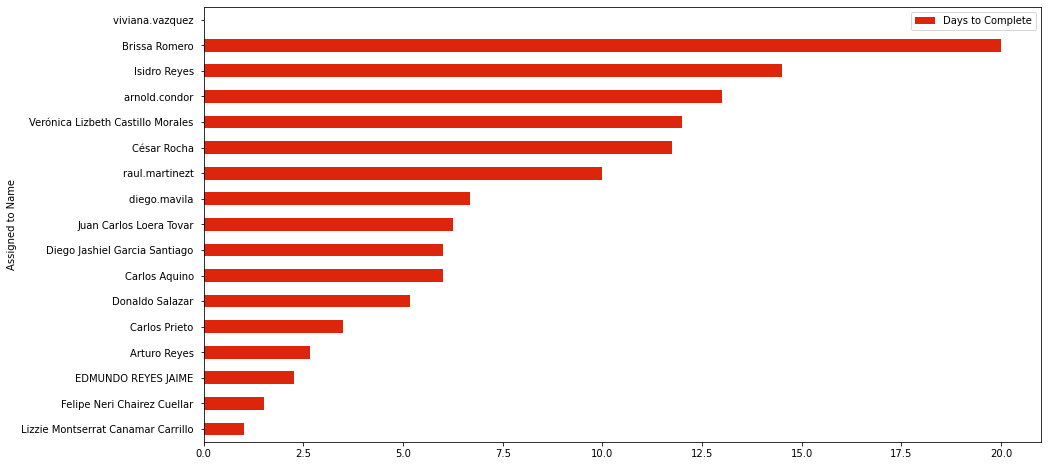

In [40]:
Actividades = DFSprint[["Days to Complete", "Assigned to Name"]]
Actividades1 = Actividades.groupby(["Assigned to Name"]).mean()
Actividades2 = Actividades1.sort_values(by="Days to Complete", ascending=True)

Actividades2.plot(kind="barh", figsize=(15,8), color="#DD250B")
plt.savefig("TeamMember.jpg")

In [41]:
DFWarning = DFSprint[DFSprint["Time Active"] == "Warning"][["Assigned to Name","Area","BU"]]

In [42]:
DFWarning.to_excel("RevisarActividades.xlsx")
print("DataFrame is written to Excel File successfully.")

DataFrame is written to Excel File successfully.
